### *** Names: Ryogo, Bibi ***

# Lab 5: N-body simulations

In this lab, adapted from Philip Mocz's public repository, you will write your own simple N-body simulation code! Then we'll compare it to the code REBOUND, a popular N-body code used for astrophysics research.

In [1]:
# As usual, import some useful packages
import numpy as np
import matplotlib.pyplot as plt

## Day 1: Writing our own N-body code

### Part 1: Some useful functions

Recall that the first step of any N-body code is to calculate the *acceleration* of each particle, caused by its gravitational interactions with all the other particles. To make this easier, let's write a function to calculate an *array* of accelerations.

In the following code, make sure to respond to all `TODO`s!

In [2]:
def getAcc( pos, mass, G, softening ):
	"""
    Calculate the acceleration on each particle due to Newton's Law
	Inputs:
	    pos (array): N x 3 matrix of positions
	    mass (array): N x 1 vector of masses
	    G (float): Newton's gravitational constant
	    softening (float): softening length
	Outputs:
	    a (array): N x 3 matrix of accelerations
	"""

	# Get positions r = [x,y,z] for all particles
	x = pos[:,0:1]
	y = pos[:,1:2]
	z = pos[:,2:3]

	# Store all pairwise particle separations: r_j - r_i
	dx = x.T - x
	dy = y.T - y
	dz = z.T - z

	# Compute the magnitude of all particle pairwise particle separations
	# TODO: fill in the definition of r^2 (use dx, dy, and dz)
	r_sq = dx**2+dy**2+dz**2
	r_sq += softening**2
	r = r_sq
	r[r>0] = r[r>0]**(-1.5)

    # Calculate x, y, and z components of acceleration
	# TODO: What does the @ symbol here mean? Use whatever resources you need to figure it out, and comment your answer below.
	# Answer: Matrix multiplication.
	ax = G * (dx * r) @ mass
	ay = G * (dy * r) @ mass
	az = G * (dz * r) @ mass

	# Pack together the acceleration components
	a = np.hstack((ax,ay,az))

	return a

Let's also write a function to calculate the kinetic and potential energy of the system.

In [3]:
def getEnergy( pos, vel, mass, G ):
    """
    Get kinetic energy (KE) and potential energy (PE) of simulation
    Inputs:
        pos (array): N x 3 matrix of positions
        vel (array): N x 3 matrix of velocities
        mass (array): N x 1 vector of masses
        G (float): Newton's gravitational constant
    Outputs:
        KE (float): kinetic energy of the system
        PE (float): potential energy of the system
    """

    # TODO: fill in the kinetic energy here (hint: you will need to use multiple np.sum() commands!)
    KE = 0.5 * np.sum(np.sum(mass * vel**2))

    # Now let's compute potential energy!
    # TODO: Based on the code in the previous function, compute dx, dy, and dz

    # Get positions r = [x,y,z] for all particles
    x = pos[:,0:1]
    y = pos[:,1:2]
    z = pos[:,2:3]

    # Store all pairwise particle separations: r_j - r_i
    dx = x.T - x
    dy = y.T - y
    dz = z.T - z

    # Compute the inverse magnitude of all pairwise particle separations 1/r
    inv_r = np.sqrt(dx**2 + dy**2 + dz**2)
    inv_r[inv_r>0] = 1.0/inv_r[inv_r>0]

    # Sum over upper triangle (to count each interaction only once)
    PE = G * np.sum(np.sum(np.triu(-(mass*mass.T)*inv_r,1)))

    return KE, PE

***Questions***

1. The `getAcc()` function has a parameter called the "softening length." What is this parameter? Skim the introduction of [this paper](https://ui.adsabs.harvard.edu/abs/2019MNRAS.487.1227Z/abstract) (Zhang et al. 2019), and write a 1-2 sentence explanation of what the softening length is and why it's important.

> Answer: The softening length is a measure of the volume of a particle. This is important because our particles are not point masses, so close interactions will behave differently.

2. Look at the line in `getEnergy()` starting with `PE = ...`. What is the equation being used to compute potential energy?

> Answer: $U = \Sigma \dfrac{Gm_i m_j}{r_{ij}}$

Before you move on to the next part, ask Prof Mia to look over your code to make sure it'll run!

### Part 2: Run the N-body simulation

Now let's set up and run the actual simulation! As always, make sure to respond to all `TODO` comments below.

In [5]:
def runSimulation(N, dt, tEnd=10.0, softening=0.1, G=1.0, plotRealTime=True):
    """ Run simple N-body simulation of random particles
    Inputs:
        N (int): number of particles
        dt (float): timestep size
    Keywords:
        tEnd (float): time at which simulation ends
        softening (float): softening length
        G (float): Newton's gravitational constant
        plotRealTime (bool): if True, plot as the simulation runs
    """

    # Initial conditions
    t = 0                         # initial time
    Nt = int(np.ceil(tEnd/dt))  # number of timesteps
    np.random.seed(17)            # set the random number generator seed
    mass = 20.0*np.ones((N,1))/N  # total mass of particles is 20
    pos  = np.random.randn(N,3)   # randomly selected positions
    vel  = np.random.randn(N,3)   # randomly selected velocities

    vel -= np.mean(mass * vel,0) / np.mean(mass)  # convert initial velocities to Center-of-Mass frame
    acc = getAcc( pos, mass, G, softening )  # calculate initial gravitational accelerations
    KE, PE  = getEnergy( pos, vel, mass, G )  # calculate initial energy of system

    # Set up some empty arrays to store variables (these will be useful for making plots!) and put in initial values
    pos_save = np.zeros((N,3,Nt+1))
    pos_save[:,:,0] = pos
    vel_save = np.zeros((N,3,Nt+1))
    vel_save[:,:,0] = vel
    KE_save = np.zeros(Nt+1)
    KE_save[0] = KE
    PE_save = np.zeros(Nt+1)
    PE_save[0] = PE
    t_all = np.arange(Nt+1)*dt

    # Prep figure
    if plotRealTime:
        %matplotlib qt
        fig = plt.figure(figsize=(4,5), dpi=80)
        ax1 = plt.subplot()

    # This is the main loop of the simulation!
    for i in range(Nt):

        # calculate accelerations
        acc = getAcc( pos, mass, G, softening )

        # TODO: update velocities (using the acceleration you just calculated)
        vel = vel + acc * dt

        # TODO: update positions (using the updated velocity you just calculated)
        pos = pos + vel * dt

        # TODO: update time
        # t += dt
        # t_all[i+1] = t

        # TODO: get energy of system
        KE, PE  = getEnergy( pos, vel, mass, G )

        # save energies, positions for plotting trail
        pos_save[:,:,i+1] = pos
        vel_save[:,:,i+1] = vel
        KE_save[i+1] = KE
        PE_save[i+1] = PE

        # plot in real time
        if plotRealTime:
            plt.sca(ax1)
            plt.cla()
            xx = pos_save[:,0,max(i-50,0):i+1]
            yy = pos_save[:,1,max(i-50,0):i+1]
            plt.scatter(xx,yy,s=1,color=[.7,.7,1])
            plt.scatter(pos[:,0],pos[:,1],s=10,color='blue')
            ax1.set(xlim=(-2, 2), ylim=(-2, 2))
            ax1.set_aspect('equal', 'box')
            ax1.set_xticks([-2,-1,0,1,2])
            ax1.set_yticks([-2,-1,0,1,2])

            plt.pause(0.001)

    # Save figure
    if plotRealTime:
        plt.close()

    return KE_save, PE_save, t_all

In [6]:
# First simulation run!
KE_save, PE_save, t_all = runSimulation(N=100, dt=0.01)

In [7]:
# For the following questions, make sure plots are inline
%matplotlib inline

***Questions***

1. Make a plot of the kinetic energy, potential energy, and total energy (KE+PE) of the system as a function of time. Make sure your axes are labeled appropriately, and use different line colors/styles to represent each line (which should be labeled in a legend!).

Text(0.5, 1.0, 'Energy vs. Time')

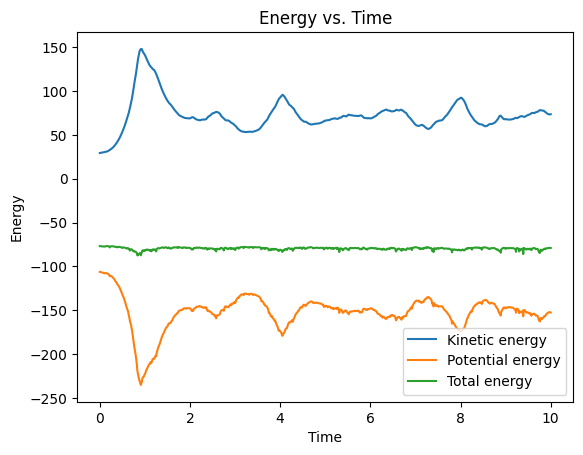

In [8]:
# Code for question 1
plt.plot(t_all, KE_save, label='Kinetic energy')
plt.plot(t_all, PE_save, label='Potential energy')
plt.plot(t_all, PE_save+KE_save, label='Total energy')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy vs. Time')

***Questions (cont.)***

2. What is the approximate relationship between the kinetic energy and potential energy? Does this make sense, given what we know about systems in quasi-equilibrium?

> Answer: It is the negative of the potential energy minus a constant (between 50 and 100). Yes, this makes sense because in systems in quasi-equilibrium, energy is conserved.

3. Why is the total energy negative?

> Answer: The system is gravitationally bound.

## Day 2: REBOUND

You may have noticed in the previous plot that the total energy is not quite constant in our simulation. Let's quantify this!

### Part 1: Conservation of energy?

***Questions***

1. Plot the percent change in total energy as a function of time. At the end of the simulation, by what percent has the total energy of the system changed?
The total energy hanged by about 2 percent.

Text(0.5, 1.0, 'Percent Change in Energy vs. Time')

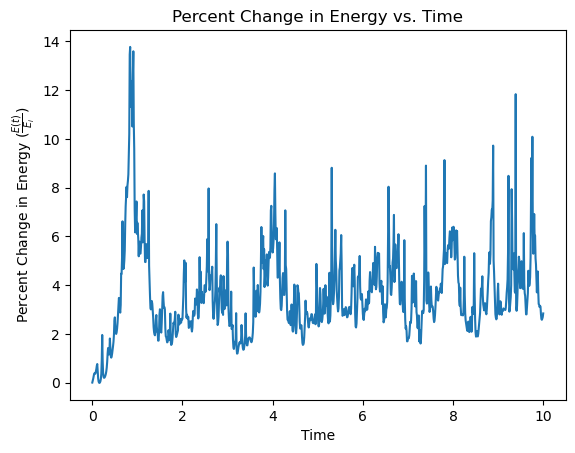

In [35]:
# Code for question 1
TE = PE_save+KE_save
plt.plot(t_all, 100*TE/TE[0] - 100)
plt.xlabel('Time')
plt.ylabel(r'Percent Change in Energy ($\frac{E(t)}{E_i}$)')
plt.title('Percent Change in Energy vs. Time')

2. How does the plot above change if you change the size of the timestep `dt`? Run the simulation a few times using different values of `dt` (set `plotRealTime=False` to make this faster, otherwise it might take an unreasonably long time to run!), then plot the percent change in energy as a function of time for each of these runs (i.e., make a version of the above plot with different lines showing the results for different values of `dt`). Make sure each line is distinct and labeled (with an attached legend)!

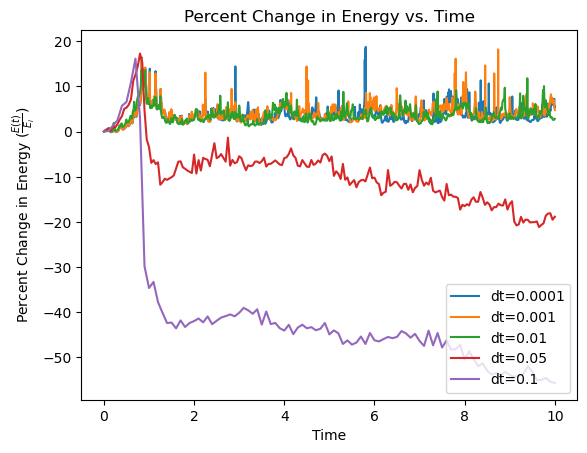

In [36]:
# Code for question 2
for dt in [0.0001, 0.001, 0.01, 0.05, 0.1]:
    KE_save, PE_save, t_all = runSimulation(N=100, dt=dt, plotRealTime=False)
    TE = PE_save+KE_save
    plt.plot(t_all, 100*TE/TE[0] - 100, label=f'dt={dt}')
plt.xlabel('Time')
plt.ylabel(r'Percent Change in Energy ($\frac{E(t)}{E_i}$)')
plt.title('Percent Change in Energy vs. Time')
plt.legend(loc='lower right')

### Part 2: REBOUND

Now let's try comparing our results against a research-grade N-body code called __[REBOUND](https://rebound.readthedocs.io/en/latest/)__.

In [39]:
%pip install rebound

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import rebound

In [3]:
# You don't need to modify anything in this cell

def runRebound(N, dt, tEnd=10.0, softening=0.1, G=1.0, plotRealTime=True):
    """ Set up REBOUND N-body simulation of random particles
    Inputs:
        N (int): number of particles
        dt (float): timestep size
    Outputs:
        times (array): array of timesteps
        energy (array): array of total energy
    Keywords:
        tEnd (float): time at which simulation ends
        softening (float): softening length
        G (float): Newton's gravitational constant
        plotRealTime (bool): if True, plot as the simulation runs
    """

    sim = rebound.Simulation()

    # Set the simulation parameters to be the same as our earlier code
    N         = N    # number of particles
    sim.softening = softening    # softening length
    sim.G         = G    # Newton's Gravitational Constant

    # Use the same random number generator seed, so the particles will start in the same place
    np.random.seed(17)            # set the random number generator seed
    mass = 20.0*np.ones((N,1))/N  # total mass of particles is 20
    pos  = np.random.randn(N,3)   # randomly selected positions and velocities
    vel  = np.random.randn(N,3)

    # Add particles to simulation
    for i in range(N):
        sim.add(m=mass[i],x=pos[i,0],y=pos[i,1],z=pos[i,2],vx=vel[i,0],vy=vel[i,1],vz=vel[i,2])
    sim.move_to_com()  # move particles to center of mass frame

    if plotRealTime:
        sim.widget(size=(400,400))

    # Step the simulation forward, and save the energy of the system at each timestep
    times = np.arange(0, tEnd, dt)
    energy = np.zeros(len(times))
    for i, time in enumerate(times):
        sim.integrate(time, exact_finish_time=1)
        energy[i] = sim.energy()

    return times, energy

In [14]:
# First simulation run!
times, energy = runRebound(N=100, dt=0.01,plotRealTime=False)

***Questions***

1. Plot the percent change in total energy as a function of time for both our old N-body code and the REBOUND code. Use `N=100` and `dt=0.01` for both simulations (also recall that setting `plotRealTime=False` will make both `runSimulation()` and `runRebound()` run faster). As always, make sure to use different line colors/styles, labeling the different lines with an appropriate label. Is one of the methods clearly better than the other?

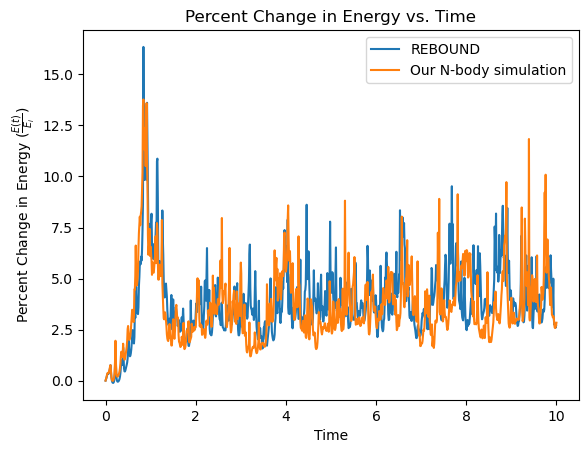

In [15]:
# Code for question 1
KE_save, PE_save, t_all = runSimulation(N=100, dt=0.01, plotRealTime=False)
TE_old=KE_save+PE_save
plt.plot(times, 100*energy/energy[0]-100, label='REBOUND')
plt.plot(t_all, 100*TE_old/TE_old[0]-100, label='Our N-body simulation')
plt.xlabel('Time')
plt.ylabel(r'Percent Change in Energy ($\frac{E(t)}{E_i}$)')
plt.title('Percent Change in Energy vs. Time')
plt.legend()

> Answer for question 1: The percent change over time is about the same for both simulations.

2. Do the same thing, but this time set the `softening` parameter to 0.01 (instead of the default 0.1). Now what happens? Why do you think this plot is different from the plot from question 1?

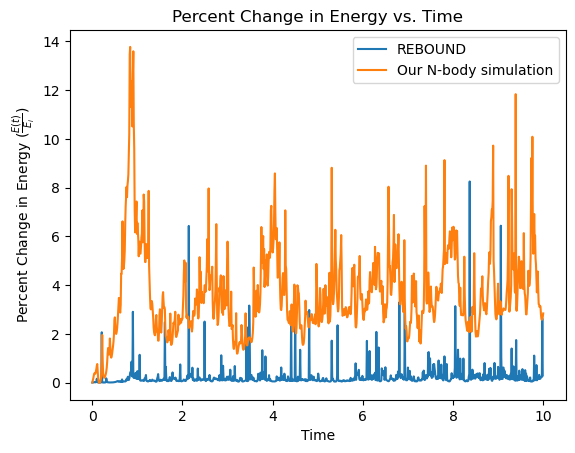

In [17]:
# Code for question 2
times, energy = runRebound(N=100, dt=0.01, softening = 0.01, plotRealTime=False)
plt.plot(times, 100*energy/energy[0]-100, label='REBOUND')
plt.plot(t_all, 100*TE_old/TE_old[0]-100, label='Our N-body simulation')
plt.xlabel('Time')
plt.ylabel(r'Percent Change in Energy ($\frac{E(t)}{E_i}$)')
plt.title('Percent Change in Energy vs. Time')
plt.legend()

> Answer for question 2:

3. The way N-body simulations work is by integrating the equations of motion for each particle (that's what we did when we "updated" the particle velocities and accelerations at each timestep). Our N-body code does this integration using a version of the "semi-implicit Euler method." What integrator does REBOUND use? Look up the REBOUND documentation to find the answer. (Hint: REBOUND can be made to use one of many integrators, but it uses one particular method as its default.) In what 2 main ways is this method different from the semi-implicit Euler method?

> Answer for question 3:

## Submitting Pre-labs and Labs for Grading

Before submitting any notebook for grading, please follow the following steps:

1) Make sure the names of all group members are in a markdown cell at the top of the file.

2) Save the notebook as a PDF. Depending on what program you use, you may need to use some variation of the following command: "File -> Print -> Save to PDF"

3) Upload the PDF to Gradescope. **Make sure all group members' names are on the Gradescope submission, and that all code outputs (and anything you changed in the code, including comments) are visible.**